In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)

C:\Users\watta\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\watta\.cache\kagglehub\datasets\shree1992\housedata\versions\2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(path + "/data.csv")

In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [21]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [22]:
df.isnull().sum().sum()

np.int64(0)

In [23]:
print(df.shape)
print(df.columns.tolist)

(4600, 18)
<bound method IndexOpsMixin.tolist of Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')>


In [4]:
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors"]
target = "price"

df_model = df[features + [target]].dropna().copy()
X = df_model[features].values
y = df_model[target].values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [15]:

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Download dataset
path = kagglehub.dataset_download("shree1992/housedata")
print("Path to dataset files:", path)

# Load the dataset
import os
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    df = pd.read_csv(csv_file)
    print(f"\nDataset loaded: {csv_file}")
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:\n{df.head()}")
    print(f"\nColumn names:\n{df.columns.tolist()}")
    print(f"\nData info:")
    print(df.info())
else:
    print("No CSV file found!")


# Gradient Descent Implementation
class GradientDescentRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        """
        Initialize Gradient Descent Regressor

        Parameters:
        - learning_rate: Step size for parameter updates
        - n_iterations: Maximum number of iterations
        - tolerance: Convergence threshold
        """
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _compute_cost(self, X, y, weights, bias):
        """Compute Mean Squared Error cost function"""
        m = len(y)
        predictions = X.dot(weights) + bias
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost

    def _compute_gradients(self, X, y, weights, bias):
        """Compute gradients for weights and bias"""
        m = len(y)
        predictions = X.dot(weights) + bias

        # Gradients
        dw = (1/m) * X.T.dot(predictions - y)
        db = (1/m) * np.sum(predictions - y)

        return dw, db

    def fit(self, X, y):
        """
        Train the model using Gradient Descent

        Parameters:
        - X: Training features (m samples, n features)
        - y: Target values (m samples)
        """
        m, n = X.shape

        # Initialize parameters
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            # Compute cost
            cost = self._compute_cost(X, y, self.weights, self.bias)
            self.cost_history.append(cost)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, self.weights, self.bias)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Print progress
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")

            # Check convergence
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.tolerance:
                print(f"Converged at iteration {i+1}")
                break

        return self

    def predict(self, X):
        """Make predictions on new data"""
        return X.dot(self.weights) + self.bias

    def score(self, X, y):
        """Calculate R² score"""
        predictions = self.predict(X)
        ss_res = np.sum((y - predictions)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)
        return r2


# Data Preprocessing and Model Training
def prepare_and_train(df):
    """Prepare data and train gradient descent model"""

    # Identify target column (usually 'price' or similar)
    target_col = None
    for col in ['price', 'Price', 'PRICE', 'SalePrice', 'median_house_value']:
        if col in df.columns:
            target_col = col
            break

    if target_col is None:
        print("\nCouldn't automatically identify target column.")
        print("Available columns:", df.columns.tolist())
        return

    print(f"\nUsing '{target_col}' as target variable")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Select only numeric columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    X = X[numeric_cols]

    # Handle missing values
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"\nUsing features: {X.columns.tolist()}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Feature scaling (important for gradient descent!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to numpy arrays
    y_train = y_train.values
    y_test = y_test.values

    # Train model with Gradient Descent
    print("\n" + "="*50)
    print("Training Gradient Descent Model")
    print("="*50)

    model = GradientDescentRegressor(learning_rate=0.01, n_iterations=1000)
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print(f"\n" + "="*50)
    print("Model Performance")
    print("="*50)
    print(f"Training R² Score: {train_score:.4f}")
    print(f"Testing R² Score: {test_score:.4f}")

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_pred_train)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_pred_test)**2))

    print(f"Training RMSE: ${train_rmse:,.2f}")
    print(f"Testing RMSE: ${test_rmse:,.2f}")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Cost function over iterations
    axes[0, 0].plot(model.cost_history, linewidth=2)
    axes[0, 0].set_xlabel('Iteration', fontsize=10)
    axes[0, 0].set_ylabel('Cost (MSE)', fontsize=10)
    axes[0, 0].set_title('Cost Function Convergence', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Actual vs Predicted (Training)
    axes[0, 1].scatter(y_train, y_pred_train, alpha=0.5, s=20)
    axes[0, 1].plot([y_train.min(), y_train.max()],
                     [y_train.min(), y_train.max()],
                     'r--', lw=2, label='Perfect Prediction')
    axes[0, 1].set_xlabel('Actual Price', fontsize=10)
    axes[0, 1].set_ylabel('Predicted Price', fontsize=10)
    axes[0, 1].set_title(f'Training Set: Actual vs Predicted (R²={train_score:.4f})',
                          fontsize=12, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Actual vs Predicted (Testing)
    axes[1, 0].scatter(y_test, y_pred_test, alpha=0.5, s=20, color='orange')
    axes[1, 0].plot([y_test.min(), y_test.max()],
                     [y_test.min(), y_test.max()],
                     'r--', lw=2, label='Perfect Prediction')
    axes[1, 0].set_xlabel('Actual Price', fontsize=10)
    axes[1, 0].set_ylabel('Predicted Price', fontsize=10)
    axes[1, 0].set_title(f'Testing Set: Actual vs Predicted (R²={test_score:.4f})',
                          fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Residuals plot
    residuals = y_test - y_pred_test
    axes[1, 1].scatter(y_pred_test, residuals, alpha=0.5, s=20, color='green')
    axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1, 1].set_xlabel('Predicted Price', fontsize=10)
    axes[1, 1].set_ylabel('Residuals', fontsize=10)
    axes[1, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Feature importance (based on weights magnitude)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Weight': np.abs(model.weights)
    }).sort_values('Weight', ascending=False)

    print(f"\n" + "="*50)
    print("Feature Importance (by weight magnitude)")
    print("="*50)
    print(feature_importance.to_string(index=False))

    return model, scaler, X.columns


# Run the complete pipeline
if csv_file:
    model, scaler, feature_names = prepare_and_train(df)

ModuleNotFoundError: No module named 'sklearn'

In [6]:
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0, ddof=0)
X_std[X_std == 0] = 1.0                 # avoid divide-by-zero

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled  = (X_test  - X_mean) / X_std

In [7]:
y_mean = y_train.mean()
y_std  = y_train.std(ddof=0)
if y_std == 0:
    y_std = 1.0

y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled  = (y_test  - y_mean) / y_std

In [8]:
m_train = X_train_scaled.shape[0]
Xb_train = np.c_[np.ones((m_train,1)), X_train_scaled]   # shape (m_train, n_features+1)

m_test = X_test_scaled.shape[0]
Xb_test = np.c_[np.ones((m_test,1)), X_test_scaled]

In [9]:
n_params = Xb_train.shape[1]   # n_features + 1
theta = np.zeros(n_params)     # start with zeros

learning_rate = 0.01
iterations = 2000

In [10]:
m = m_train
cost_history = []

for it in range(iterations):
    preds = Xb_train.dot(theta)           # shape (m,)
    error = preds - y_train_scaled        # difference (pred - actual) on scaled target
    gradients = (1.0 / m) * Xb_train.T.dot(error)
    theta -= learning_rate * gradients
    cost = (1.0 / (2*m)) * np.sum(error**2)
    cost_history.append(cost)

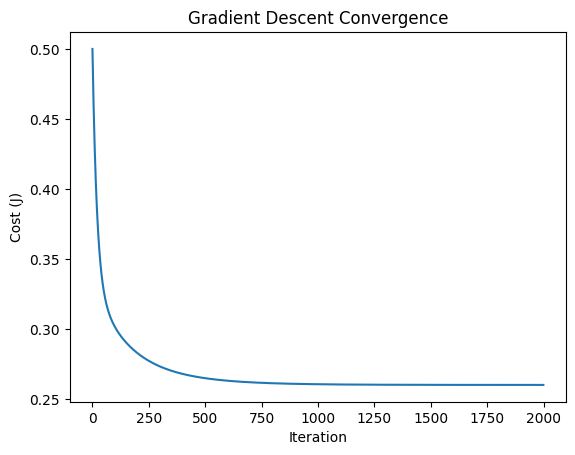

In [11]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.show()

In [12]:
y_test_pred_scaled = Xb_test.dot(theta)

# unscale to original price units
y_test_pred = y_test_pred_scaled * y_std + y_mean

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse:.2f}    R^2: {r2:.4f}")

Test RMSE: 994928.30    R^2: 0.0294


In [13]:
new_house = np.array([3, 2.0, 1800, 4000, 1.0])     # same order as features
new_scaled = (new_house - X_mean) / X_std
new_b = np.r_[1, new_scaled]                        # add bias
pred_scaled = new_b.dot(theta)
pred_price = pred_scaled * y_std + y_mean
print(f"Predicted price: {pred_price:.2f}")

Predicted price: 467659.88


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# baseline: predict training mean for every test sample
baseline_pred = np.mean(y_train)           # use train mean
baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred)**2))
baseline_mae  = np.mean(np.abs(y_test - baseline_pred))

mae = mean_absolute_error(y_test, y_test_pred)
mape_mask = y_test != 0
mape = np.mean(np.abs((y_test[mape_mask] - y_test_pred[mape_mask]) / y_test[mape_mask])) * 100

within_10 = np.mean(np.abs(y_test - y_test_pred) <= 0.10 * y_test) * 100
within_20 = np.mean(np.abs(y_test - y_test_pred) <= 0.20 * y_test) * 100

print(f"Baseline RMSE (predict train mean): {baseline_rmse:.2f}")
print(f"Model RMSE: {np.sqrt(((y_test - y_test_pred)**2).mean()):.2f}")
print(f"Model MAE: {mae:.2f}")
print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"% predictions within ±10%: {within_10:.2f}%")
print(f"% predictions within ±20%: {within_20:.2f}%")
print(f"R^2 (sanity): {r2_score(y_test, y_test_pred):.4f}")


Baseline RMSE (predict train mean): 1010500.78
Model RMSE: 994928.30
Model MAE: 221679.03
Baseline MAE: 277797.29
MAPE: 36.10%
% predictions within ±10%: 19.57%
% predictions within ±20%: 36.63%
R^2 (sanity): 0.0294
